Introduction

There are many soccer players in the world with various skills and abilities. While some players are fast but weak, others are slow but strong. The main objective of our project is to predict soccer players’ positions based on their skills, such as shooting, defending, passing, crossing, dribbling, ball control, heading, vision, agility, speed and many more features. We used logistic regression to predict a soccer player’s position, and obtained a high accuracy despite the low possibilities, as there are more than 25 different positions in soccer. 

In addition, we also performed predictive analysis regarding the shooting scores of the players. We wanted to see if we can use attacking, ball handling, and movement attributes of players to predict how well they can score. 

Questions

Given various attributes of soccer players, can we accurately predict the positions of the player? If so, how accurate can our predictions be?

Can we accurately predict how well a player is at shooting given various attributes such as movement skills, attack skills, dribbling skills?

Is it actually possible for any kind of model to predict the position of each soccer player accurately? 

Which models are best at predicting positions of players/shooting scores of players?

Can the model predict a more well-suited position than what a player currently has? For example if a player is RB, but our model detects that the player is LB, does that mean the player has attributes more well-suited for LB? 


In [40]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv("players_15.csv")
# You can pick other datasets to analyze players from different years (2016-2019)
# df = pd.read_csv("players_16.csv")
# df = pd.read_csv("players_17.csv")
# df = pd.read_csv("players_18.csv")
# df = pd.read_csv("players_19.csv")
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3


In [17]:
# Get raw dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 13.1+ MB


In [18]:
# Get description of each feature and the values they contain
df.describe()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,16155.000000,16155.000000,16155.000000,16155.000000,15916.000000,16155.000000,16155.000000,1.615500e+04,16155.000000,16155.000000,...,16155.000000,0.0,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000
mean,189284.184525,24.776230,181.083627,75.474342,1.378424,63.830393,68.350108,1.060882e+06,13056.453110,1.122501,...,49.648344,NaN,45.009037,47.656639,45.885918,15.869514,15.511668,15.354875,15.504735,15.998514
std,39749.261554,4.625321,6.618974,6.891796,0.736796,7.169896,6.580610,2.819128e+06,23488.182571,0.396263,...,14.552244,NaN,17.915206,18.743105,18.145497,17.576799,16.414173,16.010498,16.585081,17.983209
min,2.000000,16.000000,155.000000,50.000000,1.000000,40.000000,40.000000,0.000000e+00,0.000000,1.000000,...,20.000000,NaN,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,178042.500000,21.000000,176.000000,70.000000,1.000000,59.000000,64.000000,1.200000e+05,2000.000000,1.000000,...,39.000000,NaN,25.000000,25.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,200841.000000,24.000000,181.000000,75.000000,1.000000,64.000000,68.000000,3.500000e+05,5000.000000,1.000000,...,50.000000,NaN,46.000000,52.000000,49.000000,11.000000,11.000000,11.000000,10.000000,10.000000
75%,214346.000000,28.000000,186.000000,80.000000,2.000000,68.000000,73.000000,8.250000e+05,10000.000000,1.000000,...,61.000000,NaN,61.000000,64.000000,62.000000,13.000000,14.000000,13.000000,13.000000,13.000000
max,225562.000000,44.000000,204.000000,110.000000,4.000000,93.000000,95.000000,1.005000e+08,550000.000000,5.000000,...,95.000000,NaN,90.000000,91.000000,95.000000,88.000000,87.000000,92.000000,90.000000,90.000000


Data Cleaning (1)
The data sets we decided to use required some cleaning before we could get to the models and predictions.

The first step of the cleaning process was simply to drop the features that would not be usable/useful in our model. We did end up dropping some columns that may have been useful in
the models, these are: 
    short_name: We wanted to predict the position for a specific player but we realized that this column has no affect and simply we could just include the stats of the player in the prediction process.
    player_tags/player_traits: The tags just simply gives us our answer for the position that player is known for, this however is not useful to predict positions for a NEW player that is not in the dataset before. Also we wanted to focus on predicting the player position based on their current reported skills and not some tags already associated with them.
    work_rate: This column gets dropped later on after it gets split into attacking work rate and defending work rate which is more useful in the model for increased accuracy in predicting whether a player is assigned a defensive or offensive position.

Other features we considered dropping were:
    weight, height, age: we dropped these features and ran the model but did not see any significant improvement in our scores so we decided to leave them in for the final report.



In [19]:
columns_to_drop = ['sofifa_id', 'player_url', 'short_name', 'long_name', 'dob',
           'nationality', 'club_name', 'league_name', 'league_rank', 'real_face',
           'release_clause_eur', 'player_tags', 'team_jersey_number',
            'loaned_from', 'joined', 'contract_valid_until',
           'nation_position', 'nation_jersey_number', 'gk_diving', 'gk_handling',
           'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits',
           'mentality_composure', 'goalkeeping_diving', 'goalkeeping_handling',
           'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes',
           'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
            'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'value_eur', 'wage_eur', 'work_rate']

Data Cleaning (2) The next step in the cleaning process was to decide what we were going to do with the player_positions feature, this is our initial planned target feature we want to predict.

The player_positions column contains a comma-separated string of positions that the player has played. We found that players can play in multiple positions, such as LB,CB,and RB which in general are positions in defense. We interpreted this as a list of positions a player can play, not necessarily their best positions, so in the data we only kept one position from the list for each player as the model is supposed to predict the "BEST" position for each player based on their stats and not be biased by their position list. In the end we expected this to not negatively affect our results as if a players positions were all defensive for instance, they should still be predicted as a defensive position if their stats reflect those of a defensive player.

In [20]:
df_copy = df.copy()

for i in range(len(df.player_positions)):
    df_copy.player_positions[i] = df_copy.player_positions[i].split(',')
    df.player_positions[i] = df_copy.player_positions[i][0]
    
print(df['player_positions'])

0        CF
1        LW
2        RM
3        ST
4        GK
         ..
16150    CB
16151    ST
16152    LM
16153    CB
16154    CM
Name: player_positions, Length: 16155, dtype: object


Data Cleaning (3) Next up we removed any rows where there was only data for goal keepers as we are not predicting this position as it has a different set of skills and stats
per player, and vice versa for non goal keeper players not having stats filled for any of the goal keeping features, so we decided to split the data set into GK and non-GK and only focused on non-GK for this project (some future work can include predicting for this position as well).

Here we also do the ppreviously mentioned splitting of the work_rate column before dropping it. We are simply splitting it into work_rate_atk, and work_rate_def for easier encoding later on.

finally we drop the columns marked to be dropped and also fill some missing values for positions on teams that are empty with a position called "No position" so we can also encode it later.

In [21]:
df = df[df.team_position != 'GK']
work_rate_combo = df['work_rate']

work_rate_atk = []
work_rate_def = []

for item in work_rate_combo:
    split = item.split('/', 1)
    work_rate_atk.append(split[0])
    work_rate_def.append(split[1])

df['work_rate_atk'] = work_rate_atk
df['work_rate_def'] = work_rate_def

df = df.drop(columns_to_drop, axis=1)
df['team_position'] = df['team_position'].fillna('No position')

df.head()

,age,height_cm,weight_kg,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,work_rate_atk,work_rate_def
0,27,169,67,93,95,CF,Left,5,3,4,...,48,22,92,90,76,25,21,20,Medium,Low
1,29,185,80,92,92,LW,Right,5,4,5,...,63,24,91,81,85,22,31,23,High,Low
2,30,180,80,90,90,RM,Left,5,2,4,...,47,39,89,84,80,29,26,26,High,Low
3,32,195,95,90,90,ST,Right,5,4,4,...,84,20,86,83,91,25,41,27,Medium,Low
5,27,181,81,89,91,ST,Right,5,4,4,...,78,41,88,84,85,30,45,38,High,Medium


Pipelines (1) Below we set up the numerical and catagorical pipelines for encoding the features.

for the numerical pipeline we kept it simple, only imputing with median value strategy and scaling using standardScaler().

for the catagorical pipeline we impute with "most frequent" as we found this to be sufficient, and then oneHotEncoder() for encoding the values.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
num_attribs = ["age", "height_cm", "weight_kg", "overall", "potential", "international_reputation", "weak_foot", "skill_moves",
              "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning", "mentality_vision",
              "mentality_penalties", "defending_marking", "defending_standing_tackle", "defending_sliding_tackle"]

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

cat_attribs = ["preferred_foot", "body_type", "work_rate_atk", "work_rate_def"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)])

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'height_cm', 'weight_kg', 'overall',
                                  'potential', 'international_reputation',
                                  'weak_foot', 'skill_moves', 'power_strength',
                                  'power_long_shots', 'mentality_aggression',
                                  'mentality_interceptions',
                                  'mentality_positioning', 'mentality_vision',
                                  'mentality_penalties', 'defending_marking',
                                  'defending_standing_tackle',
                                  'defending_sliding_tackle']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['preferred_foot', 'body_type',
                                  'work_rate_atk', 'work_rate_def'])])

Model (1) To predict positions we went with logistic regression and split our dataset into 50/50 train and test sets and specify max_iter=1000

and train/fit the model on the training set.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, stratify=df['player_positions'], train_size=0.5)
log_reg = make_pipeline(preprocessing, LogisticRegression(max_iter=1000))

y = train['player_positions']
X = train.drop(['player_positions'], axis=1)
log_reg.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height_cm',
                                                   'weight_kg', 'overall',
                                                   'potential',
                                                   'international_reputation',
                                                   'weak_foot', 'skill_moves',
                                                   'power_strength',
                                                   'power_long_shots',
                                                   'mentality_aggression',
                                                   'men...
                                                   'mentality_penalties',
                                                   'defending_marking',
                                                   'defending_standing_tackle',
                                                   'defending_sliding_tackle']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['preferred_foot',
                                                   'body_type', 'work_rate_atk',
                                                   'work_rate_def'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

Below is a snippet of the results from the prediction using log_reg.predict() with the test data set

predictions are saved in a new column in the data set df["predicted"]

In [23]:
y_test = test['player_positions']
X_test = test.drop(['player_positions'], axis=1)
test["predicted"] = log_reg.predict(X_test)
test.head()

,age,height_cm,weight_kg,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,...,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,work_rate_atk,work_rate_def,predicted
4092,20,188,83,68,74,CB,Right,1,2,2,...,72,35,39,49,70,72,66,Medium,High,CB
13583,25,180,70,57,60,RB,Right,1,3,2,...,61,51,39,28,56,61,58,High,Medium,RB
10667,20,180,82,61,64,LM,Right,1,3,3,...,25,49,58,58,36,30,34,Medium,Medium,RM
14443,21,185,75,55,60,ST,Right,1,3,3,...,20,56,48,54,23,20,23,Medium,Medium,ST
11554,23,172,68,60,63,CM,Right,1,3,2,...,57,61,61,43,36,45,39,Medium,Medium,CM


The classification report below shows some interesting results.

We see that the model precision and recall is very similar for each class, this can mean that it classified the same amount of players/positions as false positives and the same amount of false negatives. This could be a good thing if we have roughly the same ammount of players in each position in our dataset, which would lead to this result.

We also see a similar result for the cross validation predict scores when it comes to the precision and recall.

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test["predicted"]))

              precision    recall  f1-score   support

         CAM       0.46      0.47      0.46       492
          CB       0.84      0.89      0.87      1349
         CDM       0.55      0.46      0.50       589
          CF       0.00      0.00      0.00        69
          CM       0.63      0.79      0.70       978
          GK       1.00      1.00      1.00       599
          LB       0.77      0.80      0.78       586
          LM       0.43      0.34      0.38       471
          LW       0.30      0.05      0.09       164
         LWB       0.00      0.00      0.00         9
          RB       0.64      0.64      0.64       610
          RM       0.38      0.31      0.34       446
          RW       0.29      0.08      0.12       184
         RWB       0.00      0.00      0.00         8
          ST       0.73      0.90      0.81      1235

    accuracy                           0.69      7789
   macro avg       0.47      0.45      0.45      7789
weighted avg       0.66   

In [12]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(log_reg, X, y, cv=3) #validate train set

from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_scores)

array([[ 230,    0,    0,    0,   93,    0,    2,   63,    3,    0,    1,
          42,    0,    0,   59],
       [   0, 1177,   39,    0,    7,    1,   52,    0,    0,    0,   73,
           0,    0,    0,    0],
       [   0,   66,  262,    0,  166,    0,   29,    0,    0,    0,   66,
           0,    0,    0,    0],
       [  12,    0,    0,    1,    1,    0,    0,    8,    0,    0,    0,
           7,    1,    0,   39],
       [  47,    2,  113,    0,  735,    0,   24,   12,    0,    0,   29,
           6,    0,    0,    9],
       [   0,    0,    0,    0,    0,  599,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,   46,   17,    0,   27,    0,  456,    2,    0,    0,   38,
           0,    0,    0,    0],
       [  58,    0,    2,    0,   54,    0,   23,  153,    4,    0,    2,
          66,    6,    0,  103],
       [  26,    0,    0,    1,    3,    0,    2,   41,   11,    0,    1,
          27,    5,    0,   48],
       [   0,    0,    2,    0,    1,

In [25]:
from sklearn.metrics import precision_score, recall_score
pred_prec_score = precision_score(y, y_scores, average=None)
pred_recall_score = recall_score(y, y_scores, average=None)
print("precision: "  + str(pred_prec_score))
print("recall: " + str(pred_recall_score))

precision: [0.064      0.16773276 0.06938776 0.         0.12427506 0.06666667
 0.0984975  0.05405405 0.03333333 0.         0.09206349 0.05913978
 0.         0.         0.15820312]
recall: [0.06490872 0.1749444  0.05762712 0.         0.15353122 0.06677796
 0.10051107 0.04255319 0.00606061 0.         0.09508197 0.04932735
 0.         0.         0.19676113]


In [26]:
pd.Series(pred_prec_score).describe()

count    15.000000
mean      0.065824
std       0.055213
min       0.000000
25%       0.016667
50%       0.064000
75%       0.095280
max       0.167733
dtype: float64

In [27]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y, y_scores))

              precision    recall  f1-score   support

         CAM       0.06      0.06      0.06       493
          CB       0.17      0.17      0.17      1349
         CDM       0.07      0.06      0.06       590
          CF       0.00      0.00      0.00        69
          CM       0.12      0.15      0.14       977
          GK       0.07      0.07      0.07       599
          LB       0.10      0.10      0.10       587
          LM       0.05      0.04      0.05       470
          LW       0.03      0.01      0.01       165
         LWB       0.00      0.00      0.00         8
          RB       0.09      0.10      0.09       610
          RM       0.06      0.05      0.05       446
          RW       0.00      0.00      0.00       184
         RWB       0.00      0.00      0.00         7
          ST       0.16      0.20      0.18      1235

    accuracy                           0.11      7789
   macro avg       0.07      0.07      0.07      7789
weighted avg       0.11   

Now we will perform predictive analysis of the shooting scores of players

In [28]:
df = pd.read_csv("players_15.csv")

In [29]:
df = df.filter(['shooting','dribbling','attacking_crossing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_long_shots'])
df.head()

,shooting,dribbling,attacking_crossing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_long_shots
0,89.0,96.0,84,96,96,90,94,94,95,80,88
1,93.0,91.0,83,92,91,94,93,90,63,94,93
2,86.0,92.0,80,90,93,93,93,89,91,86,90
3,91.0,86.0,76,90,74,77,86,85,41,93,88
4,NaN,NaN,25,31,58,61,43,89,35,42,25


In [30]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
df = train_set.copy()

Our goal is to predict how well a player is at shooting based on various attributes related to attacking skills, ball handling skills, and movement

array([[<Axes: title={'center': 'shooting'}>]], dtype=object)

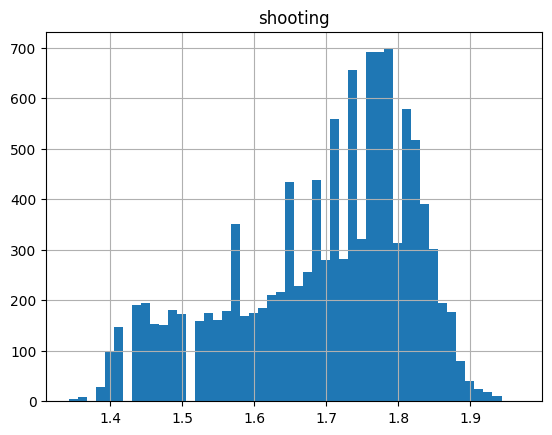

In [31]:
np.log10(df[['shooting']]).hist(bins=50)

In [32]:
# Pairwise correlation of columns
df.corr()

,shooting,dribbling,attacking_crossing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_long_shots
shooting,1.000000,0.756930,0.471651,0.719035,0.369534,0.327325,0.471085,0.438431,0.286353,0.825184,0.895375
dribbling,0.756930,1.000000,0.714611,0.907137,0.589921,0.515784,0.720339,0.527162,0.544176,0.623296,0.729923
attacking_crossing,0.471651,0.714611,1.000000,0.782665,0.594018,0.568799,0.623276,0.402642,0.533281,0.634151,0.661852
skill_ball_control,0.719035,0.907137,0.782665,1.000000,0.633478,0.620063,0.664799,0.428790,0.527445,0.798145,0.778555
movement_acceleration,0.369534,0.589921,0.594018,0.633478,1.000000,0.900229,0.769951,0.188026,0.650684,0.487176,0.501105
movement_sprint_speed,0.327325,0.515784,0.568799,0.620063,0.900229,1.000000,0.712415,0.195187,0.573138,0.496928,0.471816
movement_agility,0.471085,0.720339,0.623276,0.664799,0.769951,0.712415,1.000000,0.271363,0.723925,0.520884,0.570193
movement_reactions,0.438431,0.527162,0.402642,0.428790,0.188026,0.195187,0.271363,1.000000,0.116091,0.416233,0.418982
movement_balance,0.286353,0.544176,0.533281,0.527445,0.650684,0.573138,0.723925,0.116091,1.000000,0.367319,0.435373
power_shot_power,0.825184,0.623296,0.634151,0.798145,0.487176,0.496928,0.520884,0.416233,0.367319,1.000000,0.840318


In [33]:
# Create pipeline for preprocessing and to train model
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
num_attribs = ['dribbling','attacking_crossing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_long_shots']
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

preprocessing = ColumnTransformer([
("num", num_pipeline, num_attribs)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['dribbling', 'attacking_crossing',
                                  'skill_ball_control', 'movement_acceleration',
                                  'movement_sprint_speed', 'movement_agility',
                                  'movement_reactions', 'movement_balance',
                                  'power_shot_power', 'power_long_shots'])])

In [34]:
# Create LinearRegression model for prediction
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lin_reg = make_pipeline(preprocessing, LinearRegression())

# Fill missing values with median
median = df["shooting"].median()
df["shooting"].fillna(median, inplace=True)

y = df['shooting']
X = df.drop('shooting', axis=1)
lin_reg.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['dribbling',
                                                   'attacking_crossing',
                                                   'skill_ball_control',
                                                   'movement_acceleration',
                                                   'movement_sprint_speed',
                                                   'movement_agility',
                                                   'movement_reactions',
                                                   'movement_balance',
                                                   'power_shot_power',
                                                   'power_long_shots'])])),
                ('linearregression', LinearRegression())])

In [35]:
shooting_predictions = lin_reg.predict(X)
shooting_predictions

array([40.91925808, 52.04263897, 58.25790457, ..., 64.98374848,
       43.10124071, 27.52632684])

In [36]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(y, shooting_predictions, squared=False)
lin_rmse

4.671659313056307

In [37]:
# Create DecisionTreeRegressor model for prediction
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor())

tree_reg.fit(X, y)
tree_rmses = -cross_val_score(tree_reg, 
                               X,y,
                               scoring="neg_root_mean_squared_error", 
                               cv=10)
np.mean(tree_rmses)

6.240264702376529

In [38]:
# Create RandomForestRegressor model for prediction
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

forest_reg.fit(X, y)
shooting_predictions = forest_reg.predict(X)
shooting_predictions

array([37.04, 52.87, 54.04, ..., 61.79, 45.02, 26.45])

In [39]:
forest_rmses = -cross_val_score(forest_reg, 
                               X,y,
                               scoring="neg_root_mean_squared_error", 
                               cv=10)
np.mean(forest_rmses)

4.3607983619521615

Overall, our models seem to perform quite well. The mean square errors for all three are relatively low, with linear regression and RandomForestRegressor being the lowest with rme scores of 4.67 and 4.36 respectively.

Conclusion

In conclusion, we have used logistic regression analysis to successfully predict the position of soccer players based on the multiple attributes in the dataset. Our objective was to obtain a high accuracy. After we developed a model, and ran tests, we obtained a decent accuracy percentage. Despite some inaccuracies, we were still able to guess the position accurately in many cases. For example, in one of the tests, our prediction was RB; however, the actual position of the player was CB. Both of these positions are defensive positions but CB is a central back while the RB is Right Back. In essence, our model was able to narrow the positions down to a defensive one, but not able to exactly guess which defensive position the player had. Overall, the accuracy we got was not exactly the highest; however, we were still able to correctly estimate the general position of most players. In addition, our predictions for how well a player is at shooting was quite accurate, with our Root Square Mean Error scores quite low, thus showing high accuracy. 
